In [47]:
import pandas as pd

# Charge une feuille spécifique par son nom
file_path = "./data2/water-temp-do-data-final-xlsx-9.xls"
# print the sheet names
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Read_Me', 'MayST', 'JunST', 'JulST', 'AugST', 'SepST', 'OctST', 'MayDT', 'JunDT', 'JulDT', 'AugDT', 'SepDT', 'OctDT', 'MayDO', 'JunDO', 'JulDO', 'AugDO', 'SepDO', 'OctDO']


In [48]:
import pandas as pd

# Charge une feuille spécifique par son nom
file_path = "./data2/water-temp-do-data-final-xlsx-9.xls"
sheet_name = "SepDT"  # Remplace par le nom de la feuille que tu veux charger
temp_data = pd.read_excel(file_path, sheet_name=sheet_name)
print(temp_data.columns)

Index(['Year', 'BHR', 'BRR', 'BVR', 'CBR', 'CCK', 'CFK', 'CHL', 'CMR', 'CRR',
       'EFR', 'GRR', 'MNR', 'MSR', 'NRR', 'PRR', 'RRR', 'SRR', 'TAR', 'forest',
       'forSE', 'agstrat', 'agstratSE', 'agnonstrat', 'agnonSE'],
      dtype='object')


In [49]:
temp_data.head()

,Year,BHR,BRR,BVR,CBR,CCK,CFK,CHL,CMR,CRR,...,PRR,RRR,SRR,TAR,forest,forSE,agstrat,agstratSE,agnonstrat,agnonSE
0,1989,22.758929,22.985473,17.012027,20.545,13.367493,15.075,20.115498,19.769813,18.045455,...,15.592014,19.543175,20.5697,11.532656,18.049319,1.37099,16.192664,1.497699,19.7729,0.404041
1,1990,21.604075,18.213218,20.165162,20.946467,18.126244,13.6055,21.731181,20.5894,17.068618,...,16.25,17.514706,21.682733,13.888911,17.516353,1.344831,17.209881,0.758528,20.187344,1.020688
2,1991,24.800412,19.976033,14.090774,20.817483,12.516996,13.318102,16.9012,19.707767,15.168285,...,16.715,18.503889,19.881578,13.473578,17.903374,2.001054,15.385944,1.066115,18.545767,0.890758
3,1992,21.082271,21.921364,15.484056,20.33715,10.524753,14.405569,18.989075,20.37555,15.146782,...,17.760333,19.59475,20.310624,16.024367,17.876173,1.404593,16.675930,1.417378,19.796764,0.251981
4,1993,22.867148,19.699578,13.889661,20.52309,9.578519,12.215944,22.18491,21.499252,15.680945,...,16.770886,18.481825,21.199235,11.372178,17.74548,1.922254,13.871741,1.44419,19.752369,1.417996


In [50]:
import pandas as pd

# Liste des noms de feuilles, exclure 'Read_Me'
sheet_names = ['MayST', 'JunST', 'JulST', 'AugST', 'SepST', 'OctST', 
               'MayDT', 'JunDT', 'JulDT', 'AugDT', 'SepDT', 'OctDT', 
               'MayDO', 'JunDO', 'JulDO', 'AugDO', 'SepDO', 'OctDO']

# Initialiser une liste pour stocker les DataFrames
dfs = []

# Pour chaque feuille, extraire les données et ajouter des colonnes pour Year et Month
for sheet in sheet_names:
    df = pd.read_excel('./data2/water-temp-do-data-final-xlsx-9.xls', sheet_name=sheet)  # Remplace par le chemin vers ton fichier
    month = sheet[:3]  # Extraire le mois à partir du nom de la feuille
    df['Month'] = month  # Ajouter une colonne pour le mois
    type_ = sheet[3:]  # Extraire le type de données à partir du nom de la feuille
    df['Type'] = type_  # Ajouter une colonne pour le type de données
    # mettre year puis month en première colonne
    
    dfs.append(df)

# Concaténer les DataFrames en un seul
data = pd.concat(dfs)
ordered_columns = ['Year', 'Month', 'Type'] + [col for col in data.columns if col not in ['Year', 'Month', 'Type']]
merged_data = data[ordered_columns]


In [51]:
# trier par année puis par mois
merged_data.sort_values(['Year', 'Month'], inplace=True)


In [52]:
print(merged_data.columns)
merged_data.head()

Index(['Year', 'Month', 'Type', 'BHR', 'BRR', 'BVR', 'CBR', 'CCK', 'CFK',
       'CHL', 'CMR', 'CRR', 'EFR', 'GRR', 'HTR', 'MNR', 'MSR', 'NRR', 'PRR',
       'RRR', 'SRR', 'TAR', 'WFR', 'forest', 'forSE', 'agstrat', 'agstratSE',
       'agnonstrat', 'agnonstratSE', 'agnonSE'],
      dtype='object')


,Year,Month,Type,BHR,BRR,BVR,CBR,CCK,CFK,CHL,...,SRR,TAR,WFR,forest,forSE,agstrat,agstratSE,agnonstrat,agnonstratSE,agnonSE
0,1989,Aug,ST,26.83358,27.6095,25.0188,23.95005,25.21825,27.02335,25.81065,...,25.4226,26.5868,25.4535,26.649372,0.250337,26.353574,0.392575,25.500631,0.495826,NaN
0,1989,Aug,DT,22.331586,21.972736,15.670972,21.48426,13.287584,15.38925,21.868683,...,22.395967,11.826756,NaN,17.61537,1.28219,16.015266,1.36962,21.012985,NaN,0.817366
0,1989,Aug,DO,0.817794,0.87515,0.972278,1.22167,0.749848,0.4949,1.319103,...,1.393314,0.187156,NaN,0.918781,0.186553,0.5504,0.135095,1.335194,NaN,0.323057
0,1989,Jul,ST,27.1132,27.78665,26.27065,26.125,26.8875,26.925625,27.04455,...,26.58501,27.73998,26.51125,27.075107,0.103573,27.15944,0.297828,26.508016,0.305111,NaN
0,1989,Jul,DT,20.765282,19.57285,15.919528,19.89,13.348989,15.063525,18.829285,...,20.919014,11.654367,NaN,16.572667,1.099283,15.50268,1.141508,18.917974,NaN,0.916206


In [53]:
# sauvegarder le fichier en csv
merged_data.to_csv('merged_data.csv', index=False)

In [54]:
import pandas as pd

# Supposons que ton DataFrame s'appelle df
# Remplacer 'BHR' par le nom de la colonne de température que tu souhaites traiter

# Itérer sur chaque colonne de température
for col in ['BHR', 'BRR', 'BVR', 'CBR', 'CCK', 'CFK', 'CHL', 'CMR', 'CRR', 'EFR', 'GRR', 'HTR', 'MNR', 'MSR', 'NRR', 'PRR', 'RRR', 'SRR', 'TAR', 'WFR']:
    # Remplacer les NA par la moyenne par type et année
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')  # Convertir en numérique, remplace les erreurs par NA

    merged_data[col] = merged_data.groupby(['Year', 'Type'])[col].transform(lambda x: x.fillna(x.mean()))

# Afficher le DataFrame mis à jour
print(merged_data)


    Year Month Type        BHR        BRR        BVR        CBR        CCK  \
0   1989   Aug   ST  26.833580  27.609500  25.018800  23.950050  25.218250   
0   1989   Aug   DT  22.331586  21.972736  15.670972  21.484260  13.287584   
0   1989   Aug   DO   0.817794   0.875150   0.972278   1.221670   0.749848   
0   1989   Jul   ST  27.113200  27.786650  26.270650  26.125000  26.887500   
0   1989   Jul   DT  20.765282  19.572850  15.919528  19.890000  13.348989   
..   ...   ...  ...        ...        ...        ...        ...        ...   
29  2018   Oct   DT  19.416010  21.415933  17.864197  19.026500  14.497879   
29  2018   Oct   DO   4.965202   2.924417   4.138794   7.347750   0.706164   
29  2018   Sep   ST  27.460400  27.640300  24.231350  24.259475  25.952200   
29  2018   Sep   DT  24.432433  24.393057  18.238500  21.602300  14.403360   
29  2018   Sep   DO   0.573814   0.290171   4.436863   2.459475   0.721326   

          CFK        CHL  ...        SRR        TAR       WFR  

In [55]:
# delete les lignes de 2011 a 2015
merged_data = merged_data[merged_data['Year'] < 2015]

In [56]:
# merged_data.head()
# print tout les NA dans BHR
print(merged_data['BHR'].isna().sum())

# remplacer les NA par la moyenne de l'année par type, pour la colonne BHR
merged_data['BHR'] = merged_data.groupby(['Year', 'Type'])['BHR'].transform(lambda x: x.fillna(x.mean()))
print(merged_data['BHR'].isna().sum())

36
36


In [57]:
import pandas as pd

# Exemple de création d'un DataFrame (remplace cela par le chargement de ton propre DataFrame)
# df = pd.read_csv('ton_fichier.csv')  # Charge ton DataFrame ici

# Assure-toi que les colonnes de température sont bien numériques
temperature_columns = ['BHR']

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}


# Convertir les colonnes de température en type numérique
for col in temperature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remplacer les NA par la médiane du mois précédent et suivant
for index, row in df.iterrows():
    for col in temperature_columns:
        if pd.isna(row[col]):
            print(row)
            year = row['Year']
            month = row['Month']
            
            # Obtenir la température du mois précédent
            prev_month = (month_mapping[month] - 1) if month_mapping[month] > 1 else 12
            prev_year = year if month_mapping[month] > 1 else year - 1
            
            # Obtenir la température du mois suivant
            next_month = (month_mapping[month] + 1) if month_mapping[month] < 12 else 1
            next_year = year if month_mapping[month] < 12 else year + 1
            
            # Calculer la médiane du mois précédent et suivant
            try :
                prev_temp = df[(df['Year'] == prev_year) & (month_mapping[df['Month']] == prev_month)][col]
            except:
                prev_temp = None
            try :
                next_temp = df[(df['Year'] == next_year) & (month_mapping[df['Month']] == next_month)][col]
            except:
                next_temp = None

            
            # Calculer la médiane et remplacer NA
            if prev_temp and next_temp :
                median_temp = pd.concat([prev_temp, next_temp]).median()
            elif not prev_temp:
                median_temp = next_temp
            elif not next_temp:
                median_temp = prev_temp
            else:
                median_temp = None    
            print(median_temp)
            df.at[index, col] = median_temp

# delete None values
df = df.dropna()
# Afficher le DataFrame mis à jour
print(df)


Year              1996
BHR                NaN
BRR                 na
BVR            3.36875
CBR                 na
CCK           1.588459
CFK           2.291056
CHL            4.10225
CMR           3.824933
CRR              2.303
EFR           0.317074
GRR           1.773289
MNR           3.718543
MSR                 na
NRR            2.85055
PRR            2.65995
RRR             4.5182
SRR                 na
TAR           1.293267
forest        2.743137
forSE         0.336209
agstrat       2.143173
agstratSE     0.623011
agnonstrat    3.592578
agnonSE       0.379552
Month              Oct
Type                DO
Name: 7, dtype: object
None
Year              2011
BHR                NaN
BRR                 na
BVR                 na
CBR                 na
CCK                 na
CFK                 na
CHL                 na
CMR                 na
CRR                 na
EFR                 na
GRR                 na
MNR                 na
MSR                 na
NRR                 na
PRR   

In [58]:
merged_data.head()

,Year,Month,Type,BHR,BRR,BVR,CBR,CCK,CFK,CHL,...,SRR,TAR,WFR,forest,forSE,agstrat,agstratSE,agnonstrat,agnonstratSE,agnonSE
0,1989,Aug,ST,26.833580,27.609500,25.018800,23.95005,25.218250,27.023350,25.810650,...,25.422600,26.586800,25.45350,26.649372,0.250337,26.353574,0.392575,25.500631,0.495826,NaN
0,1989,Aug,DT,22.331586,21.972736,15.670972,21.48426,13.287584,15.389250,21.868683,...,22.395967,11.826756,NaN,17.61537,1.28219,16.015266,1.36962,21.012985,NaN,0.817366
0,1989,Aug,DO,0.817794,0.875150,0.972278,1.22167,0.749848,0.494900,1.319103,...,1.393314,0.187156,NaN,0.918781,0.186553,0.5504,0.135095,1.335194,NaN,0.323057
0,1989,Jul,ST,27.113200,27.786650,26.270650,26.12500,26.887500,26.925625,27.044550,...,26.585010,27.739980,26.51125,27.075107,0.103573,27.15944,0.297828,26.508016,0.305111,NaN
0,1989,Jul,DT,20.765282,19.572850,15.919528,19.89000,13.348989,15.063525,18.829285,...,20.919014,11.654367,NaN,16.572667,1.099283,15.50268,1.141508,18.917974,NaN,0.916206


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_temperature_evolution(data, reservoir='BHR'):
    # Convertir Year et Month en une colonne de date
    data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'], format='%Y-%b', errors='coerce')
    # Vérifier s'il y a des erreurs de conversion
    if data['Date'].isna().any():
        print("Certains mois ou années ne sont pas valides pour la conversion en date.")
        data = data.dropna(subset=['Date'])

    # Filtrer les données pour garder uniquement les colonnes nécessaires
    data_filtered = data[['Date', 'Type', reservoir]].dropna()
    # Sélectionner les types ST et DT
    data_filtered = data_filtered[data_filtered['Type'].str.contains('ST|DT')]
    data_filtered = data_filtered.sort_values('Date')

    # Vérifier si le DataFrame est vide après le filtrage
    if data_filtered.empty:
        print("Aucune donnée disponible pour le tracé.")
        return

    # Tracer l'évolution des températures pour chaque type
    plt.figure(figsize=(25, 6))  # Taille ajustée pour maximiser le dézoom horizontal
    for name, group in data_filtered.groupby('Type'):
        group = group.set_index('Date')
        group = group.asfreq('MS')  # Remplir pour chaque début de mois (MS : Month Start)
        
        # Points pour les données
        plt.scatter(group.index, group[reservoir], label=name)
        # Lignes entre les mois consécutifs
        plt.plot(group.index, group[reservoir], label=f"{name} (Ligne)", linestyle='-', marker='o', alpha=0.7)

    # Configurer l'axe X
    all_dates = data_filtered['Date'].sort_values().dt.to_period('M').drop_duplicates()
    ticks, labels = [], []
    for date in all_dates:
        if date.month == 1:  # Ajouter l'année avant janvier
            labels.append(f"{date.year}")
        else:  # Ajouter uniquement le numéro du mois
            labels.append(f"{date.month:02d}")
        ticks.append(date.to_timestamp())

    plt.xticks(ticks=ticks, labels=labels, rotation=90, fontsize=8)

    plt.title(f"Évolution des températures dans le temps - Réservoir {reservoir}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Température", fontsize=12)
    plt.legend(title="Type", fontsize=10)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tight_layout()  # Ajuste les marges pour éviter les chevauchements
    plt.show()

# Exemple d'utilisation
# plot_temperature_evolution(data)


In [63]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'], format='%Y-%b', errors='coerce')
# Vérifier s'il y a des erreurs de conversion
if data['Date'].isna().any():
    print("Certains mois ou années ne sont pas valides pour la conversion en date.")
    data = data.dropna(subset=['Date'])


data_filtered = data[['Date', 'Type', 'BHR']].dropna()
# sort by date
data_filtered = data_filtered.sort_values('Date')
dates = data_filtered[data_filtered['Type'] == 'ST']['Date']

for i in dates:
    print(i)



1989-05-01 00:00:00
1989-06-01 00:00:00
1989-07-01 00:00:00
1989-08-01 00:00:00
1989-09-01 00:00:00
1989-10-01 00:00:00
1990-05-01 00:00:00
1990-06-01 00:00:00
1990-07-01 00:00:00
1990-08-01 00:00:00
1990-09-01 00:00:00
1990-10-01 00:00:00
1991-05-01 00:00:00
1991-06-01 00:00:00
1991-07-01 00:00:00
1991-08-01 00:00:00
1991-09-01 00:00:00
1991-10-01 00:00:00
1992-05-01 00:00:00
1992-06-01 00:00:00
1992-07-01 00:00:00
1992-08-01 00:00:00
1992-09-01 00:00:00
1992-10-01 00:00:00
1993-05-01 00:00:00
1993-06-01 00:00:00
1993-07-01 00:00:00
1993-08-01 00:00:00
1993-09-01 00:00:00
1993-10-01 00:00:00
1994-05-01 00:00:00
1994-06-01 00:00:00
1994-07-01 00:00:00
1994-08-01 00:00:00
1994-09-01 00:00:00
1994-10-01 00:00:00
1995-05-01 00:00:00
1995-06-01 00:00:00
1995-07-01 00:00:00
1995-08-01 00:00:00
1995-09-01 00:00:00
1995-10-01 00:00:00
1996-05-01 00:00:00
1996-06-01 00:00:00
1996-07-01 00:00:00
1996-08-01 00:00:00
1996-09-01 00:00:00
1996-10-01 00:00:00
1997-05-01 00:00:00
1997-06-01 00:00:00


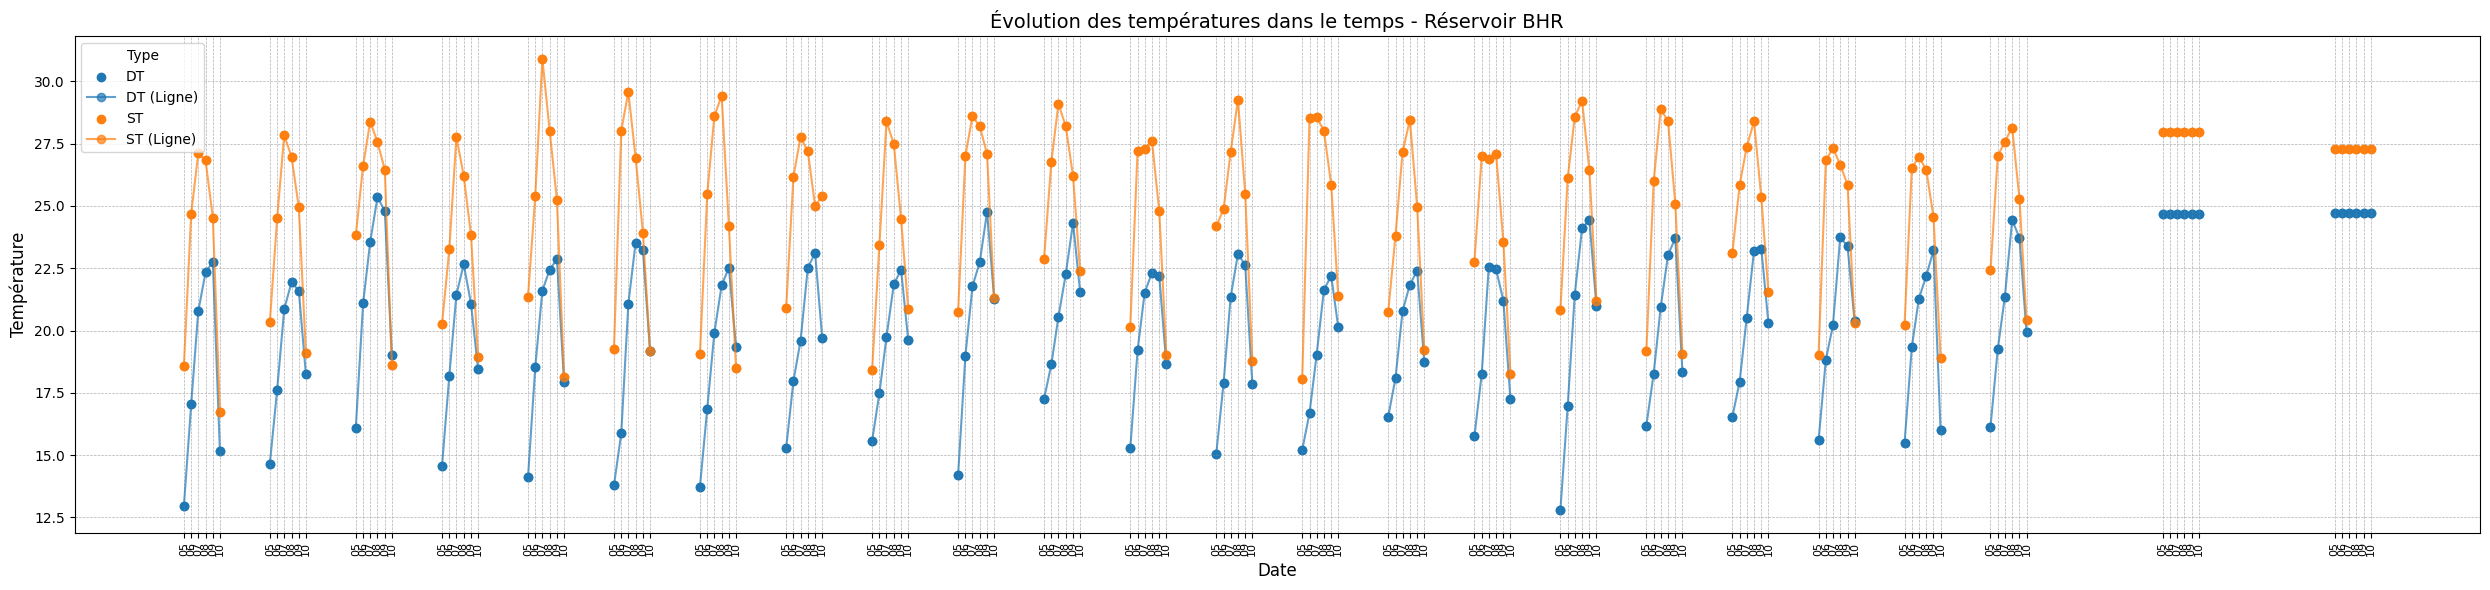

In [72]:
plot_temperature_evolution(merged_data, reservoir='BHR')